In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from apyori import apriori

In [2]:
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
train = pd.read_csv('order_products__train.csv')
prior = pd.read_csv('order_products__prior.csv')

In [20]:
print("products:")
print(products.columns)
print(products.dtypes)
print("")
print("orders:")
print(orders.columns)
print(orders.dtypes)
print("")
print("departments:")
print(departments.columns)
print(departments.dtypes)
print("")
print("aisles:")
print(aisles.columns)
print(aisles.dtypes)
print("")
print("train:")
print(train.columns)
print(train.dtypes)
print("")
print("prior:")
print(prior.columns)
print(prior.dtypes)

products:
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

orders:
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

departments:
Index(['department_id', 'department'], dtype='object')
department_id     int64
department       object
dtype: object

aisles:
Index(['aisle_id', 'aisle'], dtype='object')
aisle_id     int64
aisle       object
dtype: object

train:
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
order_id             int64
product_id           int64
add_t

In [33]:
products.sample(20)

,product_id,product_name,aisle_id,department_id
3545,3546,Organic Spelt Flour,17,13
38537,38538,Sour Chewy Candy,45,19
15405,15406,Enchilada Wrap,13,20
27837,27838,Original Sea Salt & Black Pepper Bagel Crisps,107,19
30031,30032,Maple Leaf Creme Cookies,61,19
40538,40539,Blackhead Eraser Scrub,73,11
8532,8533,Nutrient Enhanced Cranberry Lime Water Beverage,64,7
28608,28609,Whole Grain Rotini,131,9
23144,23145,Milk & Honey Bread,112,3
18793,18794,Sampler Assorted Chocolates,45,19


In [26]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [20]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [29]:
orders.groupby(['user_id', 'order_number'])

order_id  order_dow  order_hour_of_day  \
user_id order_number                                           
1       1              2539329          2                  8   
        2              2398795          3                  7   
        3               473747          3                 12   
        4              2254736          4                  7   
        5               431534          4                 15   
...                        ...        ...                ...   
206209  10             2266710          5                 18   
        11             1854736          4                 10   
        12              626363          1                 12   
        13             2977660          1                 12   
        14              272231          6                 14   

                      days_since_prior_order  
user_id order_number                          
1       1                                NaN  
        2                               15.0  
        3                               21.0  
        4                               29.0  
        5                               28.0  
...                                      ...  
206209  10                              29.0  
        11                              30.0  
        12                              18.0  
        13                               7.0  
        14                              30.0  

[3421083 rows x 4 columns]

In [22]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [23]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [24]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [30]:
train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [25]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [31]:
prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

### Combined
Merged Prior and Orders, dropped eval_set to get a combined set for EDA

In [28]:
df = pd.merge(prior, orders, how="left", left_on="order_id", right_on="order_id").drop(['eval_set'], axis=1)

In [85]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0


In [123]:
df.shape

(32434489, 9)

## Exploring - Subscriptions

#### Repeated Orders

In [33]:
# What percentage of products are reorders?
# 59%
df.reordered.sum()/len(df)

0.5896974667922161

In [44]:
df_prod1 = df.groupby(['product_id']).count().sort_values("days_since_prior_order", ascending=False)[['order_number','days_since_prior_order']]

In [47]:
df_prod1["repeats"] = df_prod1["order_number"] - df_prod1["days_since_prior_order"]

In [49]:
df_prod1.columns=["unique_orders", "repeated_orders", "single_orders"]

In [52]:
df_prod1.head()

,unique_orders,repeated_orders,single_orders
product_id,,,
24852,472565,443031,29534
13176,379450,360292,19158
21137,264683,248219,16464
21903,241921,226973,14948
47209,213584,202478,11106


In [86]:
sub = pd.merge(df_prod1, products, how="left", left_on="product_id", right_on="product_id")

In [78]:
df_prod2 = df.groupby(['product_id'])[['days_since_prior_order']].agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
df_prod2

days_since_prior_order                                          
                            count      sum  min   max       mean        std
product_id                                                                 
1                            1754  18299.0  0.0  30.0  10.432725   8.834039
2                              87    912.0  0.0  30.0  10.482759   9.052639
3                             260   2747.0  0.0  30.0  10.565385   8.571725
4                             290   4259.0  0.0  30.0  14.686207   9.515321
5                              14    174.0  4.0  30.0  12.428571  10.203425
...                           ...      ...  ...   ...        ...        ...
49684                           8     95.0  1.0  30.0  11.875000  12.123619
49685                          45    582.0  0.0  30.0  12.933333   9.478205
49686                         113    963.0  0.0  30.0   8.522124   7.101430
49687                          13    202.0  3.0  30.0  15.538462   9.439415
49688                          78   1291.0  1.0  30.0  16.551282  10.632769

[49677 rows x 6 columns]

##### Note that there are 11 products that were never purchased (total products - products in order page)

In [79]:
df_prod2.columns

MultiIndex([('days_since_prior_order', 'count'),
            ('days_since_prior_order',   'sum'),
            ('days_since_prior_order',   'min'),
            ('days_since_prior_order',   'max'),
            ('days_since_prior_order',  'mean'),
            ('days_since_prior_order',   'std')],
           )

In [81]:
df_prod2.columns = ["unique_timeframes", "total_days_elapsed", "min", "max", "mean", "std"]

In [82]:
df_prod2

,unique_timeframes,total_days_elapsed,min,max,mean,std
product_id,,,,,,
1,1754,18299.0,0.0,30.0,10.432725,8.834039
2,87,912.0,0.0,30.0,10.482759,9.052639
3,260,2747.0,0.0,30.0,10.565385,8.571725
4,290,4259.0,0.0,30.0,14.686207,9.515321
5,14,174.0,4.0,30.0,12.428571,10.203425
...,...,...,...,...,...,...
49684,8,95.0,1.0,30.0,11.875000,12.123619
49685,45,582.0,0.0,30.0,12.933333,9.478205
49686,113,963.0,0.0,30.0,8.522124,7.101430


In [88]:
sub = pd.merge(sub, df_prod2, how="left", left_on="product_id", right_on="product_id")
sub.head()

,product_id,unique_orders,repeated_orders,single_orders,product_name,aisle_id,department_id,unique_timeframes,total_days_elapsed,min,max,mean,std
0,24852,472565,443031,29534,Banana,24,4,443031,4823868.0,0.0,30.0,10.888331,8.499401
1,13176,379450,360292,19158,Bag of Organic Bananas,24,4,360292,3626175.0,0.0,30.0,10.064545,8.207377
2,21137,264683,248219,16464,Organic Strawberries,24,4,248219,2491406.0,0.0,30.0,10.037129,8.219870
3,21903,241921,226973,14948,Organic Baby Spinach,123,4,226973,2542019.0,0.0,30.0,11.199654,8.689839
4,47209,213584,202478,11106,Organic Hass Avocado,24,4,202478,2066411.0,0.0,30.0,10.205608,8.319953


In [92]:
sub = pd.merge(sub, aisles, how="left", left_on="aisle_id", right_on="aisle_id")
sub.head()

,product_id,unique_orders,repeated_orders,single_orders,product_name,aisle_id,department_id,unique_timeframes,total_days_elapsed,min,max,mean,std,aisle
0,24852,472565,443031,29534,Banana,24,4,443031,4823868.0,0.0,30.0,10.888331,8.499401,fresh fruits
1,13176,379450,360292,19158,Bag of Organic Bananas,24,4,360292,3626175.0,0.0,30.0,10.064545,8.207377,fresh fruits
2,21137,264683,248219,16464,Organic Strawberries,24,4,248219,2491406.0,0.0,30.0,10.037129,8.219870,fresh fruits
3,21903,241921,226973,14948,Organic Baby Spinach,123,4,226973,2542019.0,0.0,30.0,11.199654,8.689839,packaged vegetables fruits
4,47209,213584,202478,11106,Organic Hass Avocado,24,4,202478,2066411.0,0.0,30.0,10.205608,8.319953,fresh fruits


In [94]:
sub = pd.merge(sub, departments, how="left", left_on="department_id", right_on="department_id")

In [98]:
sub.isna().sum()

product_id              0
unique_orders           0
repeated_orders         0
single_orders           0
product_name            0
aisle_id                0
department_id           0
unique_timeframes       0
total_days_elapsed      0
min                    31
max                    31
mean                   31
std                   230
aisle                   0
department              0
dtype: int64

In [100]:
sub['min'] = sub['min'].fillna(0)
sub['max'] = sub['max'].fillna(0)
sub['mean'] = sub['mean'].fillna(0)
sub['std'] = sub['std'].fillna(0)
sub.isna().sum()

product_id            0
unique_orders         0
repeated_orders       0
single_orders         0
product_name          0
aisle_id              0
department_id         0
unique_timeframes     0
total_days_elapsed    0
min                   0
max                   0
mean                  0
std                   0
aisle                 0
department            0
dtype: int64

In [108]:
sub['per_reordered'] = sub['repeated_orders']/sub['unique_orders']

In [116]:
popular = sub[(sub.per_reordered > 0.5) & (sub.repeated_orders > 1e4)]

In [127]:
popular.shape

(444, 16)

#### Distribution of Days Between Reordering

In [158]:
user_product_all = df.groupby(['product_id', 'user_id']).head()

In [159]:
user_product_reorder = user_product_all[user_product_all.reordered == 1]

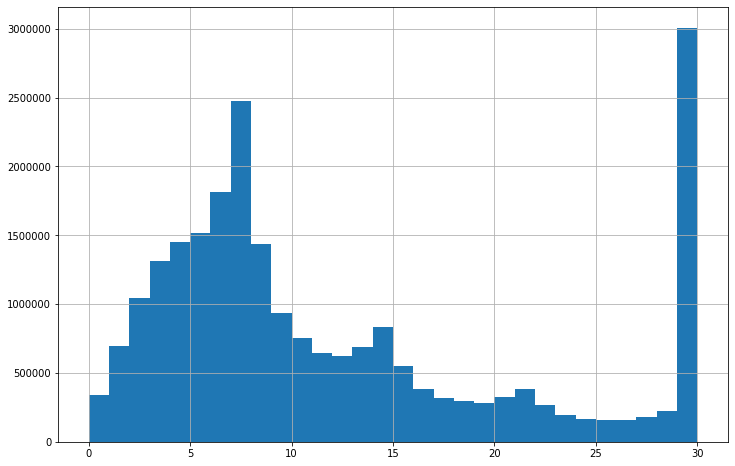

In [164]:
user_product_all['days_since_prior_order'].hist(bins=30, figsize=(12,8))

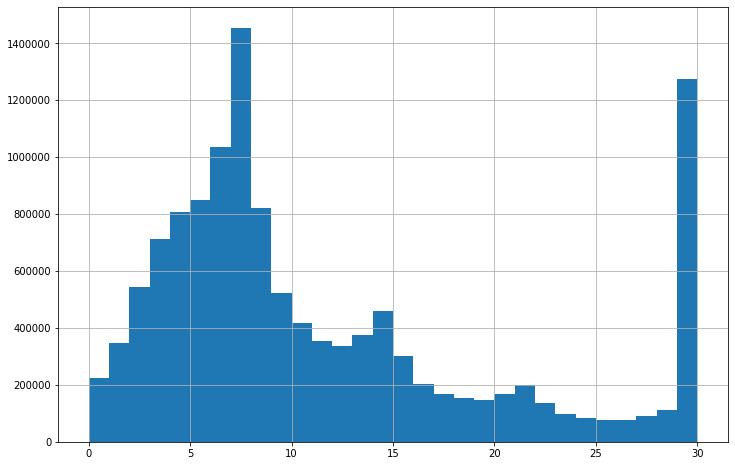

In [163]:
user_product_reorder['days_since_prior_order'].hist(bins=30, figsize=(12,8))